<a name="cell-TOC-opt"></a>

### 8. [Optimizers: pragmatic implementations of Newton's Method](#cell-opt-fx-)

1. [Gradient and Newton-Like Methods](#cell-opt-fx-newtonlike)
2. [Quasi-Newton Methods](#cell-opt-fx-quasi-newton) 
3. [Modern Optimizers](#cell-opt-fx-modern-optimizers)
4. [Newton's Method Review and Re-Examination: The Sandwich Estimator](#cell-opt-fx-sandwich)
5. [Iteratively Reweighted Least Squares (IRLS): The Logistic Regression Example](#cell-opt-fx-irls) 
   (`STA410_W24_Week8_Homework_LogisticRegressionIRLS.ipynb`)
5. [M Estimation (maximum likelihood type)](#cell-opt-fx-m-est)
    1. [Robust Regression with Huber Loss](#cell-opt-fx-huber) 
       (`STA410_W24_Week8_Extra_HuberLossIRLS.ipynb`)
4. [Quasi-Likelihoods](#cell-opt-fx-quasi)
      

<!--
    1. ~Combinatorial (Discrete) Optimzation~
      - ~Simulated Annealing~
    2. ~Constrained optimization~
      - ~Expectation-Maximization~
      - ~Interior and Exterior Point Algorithms~
-->

<a name="cell-opt-fx-"></a>

## 8. Optimizers: pragmatic implementations of Newton's Method ([Return to TOC](#cell-TOC-opt)) 
---

1. ***Newton's method*** is extremely effective when it isn't 
    1. overly computationally prohibitive and 
    2. the objective functions of interest are reasonably ***convex*** 

2. But many (and probably most) contexts, can benefit from approximation or simplification of ***Newton's method*** which either 

    1. reduce the computational cost or 
    2. extend the usefulness of Newton's method into the context of ***non-convex*** functions

> Essentially all derivative-based optimization methods<br>can be viewed as some sort of practical and pragmatic variation on ***Newton's method***

***Gradient*** and ***Newton-like methods*** substitute computationally simpler alternatives $M^{(t)}$ in place of the Hessian $H_{g(x^{(t)})}$ and use

$$x^{(t+1)} = x^{(t)} - \alpha[M^{(t)}]^{-1}\nabla_x g(x^{(t)}) \quad \text{ instead of } \quad x^{(t+1)} = x^{(t)} - \alpha\left[H_{(x^{(t)})}\right]^{-1}\nabla_x g(x^{(t)})$$

- ALWAYS avoid inversion $[M^{(t)}]^{-1}$ and just solve for $d$ in $M^{(t)}_{p\times p}d = \nabla_x f(x)$, and for high dimensions with large $p$... 
- "direction search" computational cost can be reduced with ***truncated ("doubly iterative") methods*** that instead approximate $d = [M^{(t)})^{-1}]\nabla_x f(x)$ with a few steps $s$ of $O(sn^2)$ ***iterative methods*** like ***Gauss-Seidel*** (or ***conjugate gradient descent***)


<table>
<tr><td>

Newton's Method Converging "Quadratically" Quickly
<img src="https://www.cs.cornell.edu/courses/cs4780/2018fa/lectures/images/gradient_descent/gradientfigures.png" style='width:615px'>
<img src="https://www.cs.cornell.edu/courses/cs4780/2021fa/lectures/images_new/GD/Compare.jpg" style='width:615px'>
<img src="https://www.researchgate.net/publication/341040067/figure/fig1/AS:885861650546689@1588217284910/Behaviour-of-gradient-descent-and-Newtons-method-for-a-quadratic-function-Image.ppm" style='width:615px'>
    
</td><td>
    
Gradient Descent Step Size Tuning with Momentum Speedups
<img src="https://i.stack.imgur.com/VxQgz.png" style='width:725px'>
<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRDVEvK1_keJCST6km5ZM03WduqVVIwx6ifXmWAP1if8w-uQ1wdxoQ_OrSxWEHojZ9R68Q&usqp=CAU" style='width:725px'>
<img src="https://miro.medium.com/v2/resize:fit:618/1*FUAKhbj7lvKxq73EPl4rzg.png" style='width:725px'>
    
</td><td>

Quadratic Optimization Considerations
<img src="https://qph.cf2.quoracdn.net/main-qimg-591ce5575f71110585d9246bf8c2ca0b-pjlq" style='width:450px'>
<img src="https://media.springernature.com/lw685/springer-static/image/chp%3A10.1007%2F978-1-4842-4470-8_16/MediaObjects/463852_1_En_16_Fig3_HTML.jpg" style='width:450px'>
<img src="https://doc.cfd.direct/notes/cfd-general-principles/img/index2353x.png" style='width:450px'>
<img src="https://i.stack.imgur.com/ac9O7.png" style='width:450px'>

</td></tr></table>

<a name="cell-opt-fx-newtonlike"></a>

## 8.1 Gradient and Newton-Like Methods ([Return to TOC](#cell-TOC-opt)) 

---

> The ***step size*** $\alpha$ parameter somewhat partially addresses the ***line search problem*** and ***monotonic ascent/descent***, but see `STA410_W24_Week8_Extra_Details.ipynb` for further notes

While the approximation $M^{(t)} \approx H_{g(x)}(x^{(t)})$ may attempt to be accurate, often the motivation is simply computational feasibility 

- $\alpha H_{g(x^{(t)})}^{-1} \approx \alpha I \quad\quad\;\,: \quad\theta^{(t)} - \alpha \sum_{i=1}^n \nabla_\theta f_{x_i}(\theta^{(t)}) \quad\quad\quad\quad \nabla_\theta f_{\mathbf x}(\theta^{(t)}) = \sum_{i=1}^n \nabla_\theta f_{x_i}(\theta^{(t)})$

- $\alpha H_{l(\theta^{(t)})}^{-1} \approx \alpha {\mathcal I(\theta^{(t)})}{}^{-1}: \quad \theta^{(t)} + \alpha {\mathcal I(\theta^{(t)})}{}^{-1} \sum_{i=1}^n \nabla_\theta l_i(\theta)|_{\theta^{(t)}}\quad\, \nabla_\theta l(\theta)|_{\theta^{(t)}} = \sum_{i=1}^n \nabla_\theta l_i(\theta)|_{\theta^{(t)}}$
$\quad\quad\quad\quad\quad\quad\quad\quad\quad\, \color{gray}{\theta^{(t)} + \alpha \left(\nabla_\theta l(\theta)|_{\theta^{(t)}}(\nabla_\theta l(\theta)|_{\theta^{(t)}})^T\right)^{-1} \sum_{i=1}^n \nabla_\theta l_i(\theta)|_{\theta^{(t)}}}$

- $\alpha H_{l(\theta^{(t)})}^{-1} \approx \cdots \quad\quad\;\;\; : \quad \theta^{(t)} + \alpha \left((J g_x(\theta^{(t)})^TJ g_x(\theta^{(t)}\right) ^{-1} \sum_{i=1}^n \nabla_\theta f_{x_i}(\theta^{(t)}) ({y^{(t)}_i - f_{x_i}(\theta^{(t)})})$

- $\alpha H_{l(\theta^{(t)})}^{-1} \approx \alpha[M^{(t)}]^{-1}: \quad x^{(t)} - \alpha[M^{(t)}]^{-1}\nabla_x g(x^{(t)}) \quad \text{is called a }\textbf{quasi-Newton's method }\text{when}$

$M^{(t)}$ satisfies the so-called ***secant condition*** (a discrete approximation of second order derivatives <u>which is not quite the ***Hessian***...</u>)
$$ \overbrace{\nabla_{x}g(x^{(t)}) - \nabla_{x}g(x^{(t-1)})}^{\Delta^{(t)}_{\nabla_{x}g}} = M^{(t)}\overbrace{(x^{(t)} - x^{(t-1)})}^{\Delta_x^{(t)}}$$

The ***secant method*** is a discrete approximation of ***univariate Newton's method*** which has slower convergence but faster computation that sometimes improves overall performance: <u>***Quasi-Newton's method's*** is the multivariate generalization</u>


<a name="cell-opt-fx-quasi-newton"></a>

## 8.2 Quasi-Newton Methods ([Return to TOC](#cell-TOC-opt)) 

---

$M^{(t)} \approx H_{g(x^{(t)})}$ need not necessarily be a good esimtate of the ***(negative) observed Fisher information***; and, the ***secant condition*** alone does not provide an efficient 
calculation of $M^{(t)}$ but the (computationally inexpensive) ***rank-one update*** (derived [here](https://personal.math.ubc.ca/~loew/m604/web-ho/sr1.pdf))

$$M^{(t)} = M^{(t-1)} + \underbrace{\frac{v^{(t)}[v^{(t)}]^T}{[v^{(t)}]^T\Delta_x^{(t)}c}}_{\text{rank-one update}} \quad \text{ where } \quad v^{(t)} = \left(\Delta^{(t)}_{\nabla_{x}g} - M^{(t-1)}\Delta_x^{(t)}\right)$$

results in $M^{(t)}$ which satisfies the ***secant condition***, subject to some caveats

A ***rank-two version*** of the above which both satisfies the ***secant condition*** and confers ***hereditary definiteness*** is the so-called ***BFGS*** update (named after its authors). The (*rank-two*) ***BFGS*** update is just the (*rank-two*) ***Broyden class update*** 

$$\begin{align*} M^{(t)} = {} & M^{(t-1)} - \frac{M^{(t-1)}\Delta_x^{(t)} [M^{(t-1)}\Delta_x^{(t)}]^T}{[\Delta_x^{(t)}]^TM^{(t-1)}\Delta_x^{(t)}} + \frac{\Delta^{(t)}_{\nabla_{x}g}[\Delta^{(t)}_{\nabla_{x}g}]^T}{[\Delta_x^{(t)}]^T\Delta^{(t)}_{\nabla_{x}g}} + \delta^{(t)}\left([\Delta_x^{(t)}]^TM^{(t-1)}\Delta_x^{(t)} \right)[d^{(t)}]^Td^{(t)}\\
{} & \text{where } d^{(t)} = \frac{\Delta^{(t)}_{\nabla_{x}g}}{[\Delta_x^{(t)}]^T\Delta^{(t)}_{\nabla_{x}g}} - \frac{M^{(t-1)}\Delta_x^{(t)}}{[\Delta_x^{(t)}]^TM^{(t-1)}\Delta_x^{(t)}}
\end{align*}$$

with $\delta^{(t)}=0$, and again subject to some caveats

> See `STA410_W24_Week8_Extra_Details.ipynb` for further notes


<a name="cell-opt-fx-modern-optimizers"></a>

## 8.3 Modern Optimizers ([Return to TOC](#cell-TOC-opt)) 

---

***High-dimensional non-convex*** optimization is increasingly predominant (e.g., in ***deep learning***)
- in which case ***curvature*** information ***Hessians*** only speeds convergence towards ***local optima***
- (while requireing $O(p^2)$ computation <u>[for a single data point]</u> and subsequent $O(p^3)$ or $O(sp^2)$ "direction solving")

The main challenge is to make sufficient progress to avoid initial ***local optima*** "traps" early in the optimization process; whereas, "optimal performance" is typically equivalently reached before ***gradient norms*** vanish across different "sufficient" ***local optima*** 

- ***Stochastic gradient descent (SGD)*** uses small ***batches*** (often $n\neq m=32$) and multiple passes (***epochs***) through a data set $$E_x\left[ \nabla_\theta g_x(\theta_{t-1}) \right] \approx \frac{1}{m} \sum_{i=1}^m \nabla_\theta g_{x_i}(\theta_{t-1}) \color{gray}{= \nabla_\theta \frac{1}{m} \sum_{i=1}^m g_{x_i}(\theta_{t-1})} \quad \longrightarrow \quad \theta_{t} = \theta_{t-1} + \alpha \nabla_\theta g_{x_{m=32}}(\theta_{t-1})$$

    - For $m<<n$ there is huge computational savings... and "steps $\times$ samples $\times$ parameters in ***SGD*** is $O(smp)$<br><u>which will likely actually even even outperform ***Newton's Method*** on a per computational cost basis...</u>
    - ***SGD*** also tends to empirically outpeform full sample ***GD*** because the stochastic gradients travel "more loosely" and cannot overfit as much as in the end since their final update is never an "optimum" due to its stochasticity
        

<a name="cell-opt-fx-modern-optimizers-1"></a>

## 8.3 Modern Optimizers 

---

- <font style='color:gray'>***Neterov***</font> ***Momentum*** uses a "gradient running average" $\displaystyle v_t = \epsilon_t v_{t-1} + \alpha_t \nabla_\theta \frac{1}{m} \sum_{i=1}^m g_{x_i}(\theta_{t-1} \color{gray}{+ \epsilon_{t} v_{t-1}})$ 

    - with ***learning rate*** $\alpha_t$ and ***historic decay*** weighting schedules $\epsilon_t$ finally specifying $\theta_t = \theta_{t-1} - v_t$  
    - which, instead of using the ***Hessian*** to understand function shape,<br>"predicts" function shape under the assumption that previous ***gradients*** are good estimates of future ***gradients***  

- ***Adagrad*** adds coordinate-specific learning inverse to accumulated progress along each axis so far 
  $$\begin{align*}
  g_t = {} & \nabla_\theta \frac{1}{m} \sum_{i=1}^m g_{x_i}(\theta_{t-1}) \;\;\quad\quad r_t = r_{t-1} + g_t \odot g_t \quad \text{  element-wise product}\\
  \theta_t = {} & \theta_{t-1} - \frac{\alpha_t}{\delta_t+\sqrt{r_t}} \odot g_t \quad \text{  element-wise square root, division, and product}
  \end{align*}$$
  
    - ideally making step sizes smaller along fast-moving axes and larger along slow-moving axes

- **RMSprop** improves the accumulation in ***Adagrad*** with a decaying running average and incorporates ***momentum*** 
  $$\begin{align*}
  r_t = \rho r_{t-1} + (1-\rho) g_t \odot g_t \quad\quad v_t = {} & \epsilon_t v_{t-1} + \frac{\alpha_t}{\delta_t+\sqrt{r_t}} \odot g_t \quad\quad 
  \theta_t = \theta_{t-1} - v_t
  \end{align*}$$

    - allowing for locally variying coordinate-specific learning rates while maintaining fast-moving axes


<a name="cell-opt-fx-modern-optimizers-2"></a>

## 8.3 Modern Optimizers 

---

- **Adam** is a slight (typically equivalently performing) variant of ***RMSprop*** that alternatively implements ***momentum*** as a decaying running average

  $$\begin{align*}
  v_t = {} & \rho_v v_{t-1} + (1-\rho_v) g_t \quad\quad\quad \times \frac{1}{1-\rho_v^t} \text{ to correct if } v_0 = 0  \\
  r_t = {} & \rho_s r_{t-1} + (1-\rho_s) g_t \odot g_t \quad \;\, \times  \frac{1}{1-\rho_s^t} \text{ to correct if } r_0=0 \\
  g_t = {} & \nabla_\theta \frac{1}{m} \sum_{i=1}^m g_{x_i}(\theta_{t-1}) \quad \quad \quad \;\;\;   
  \theta_t = \theta_{t-1} - \frac{\alpha_t}{\delta_t+\sqrt{r_t}} \odot v_t
  \end{align*}$$
  
The methods beyond ***SGD*** rescale the ***gradient*** in the same manner as a ***diagonal approximation*** $H_{g(\theta)}^{-1} \approx I \circ H_{g(\theta)}^{-1} = D_\gamma^{-1}$ which ignores the off-diagonal elements of the ***Hessian***, and could be directly approximated using the second order partial derivatives as

  $$[D_{\gamma}]_{ii} = \frac{\partial^2 g (\theta)}{\partial\theta_i\partial\theta_i} \approx \gamma_i \quad \text{ and } \quad [D_{\gamma}]_{ij} = \frac{\partial^2 g( \theta)}{\partial\theta_i\partial\theta_j} \approx 0$$ 

  and subsequently approximating ***Newton's method*** as $\theta^{(t+1)} = \theta^{(t)} - \alpha D_\gamma^{-1} \nabla_\theta g(\theta^{(t)})$ perhaps incorporating ***momentum*** forms

> Emtiyaz Khan characterizes these common algorithms as varying degrees of approximation to "Bayesian Learning Rules" in this [presentation](https://slideslive.com/38923183/deep-learning-with-bayesian-principles), starting around slide 60.




<a name="cell-opt-fx-modern-optimizers-3"></a>

## 8.3 Modern Optimizers 

---

| ![](https://miro.medium.com/v2/resize:fit:1400/1*m7-otgfbxiAvSipInHliXw.gif) |
|-|
| |

<a name="cell-opt-fx-sandwich"></a>
## 8.4 Newton's Method Review and Re-Examination:<br>The Sandwich Estimator ([Return to TOC](#cell-TOC-opt)) 
---

***Log likelihood***  $g(\theta) = \log f(x|\theta) = \sum_{i=1}^n \log f(x_i|\theta) = \sum_{i=1}^n g_i(\theta)\;$ maximization by ***Newton's Method*** is

\begin{align*}
\theta^{(t+1)} & = {} \theta^{(t)} - \frac{g'(\theta^{(t)})}{g''(\theta^{(t)})} = \theta^{(t)} -  \frac{ \sum_{i=1}^n  g_i'(\theta^{(t)})}{ \sum_{i=1}^n  g_i''(\theta^{(t)})} \\ 
& = {} \sum_{i=1}^n \frac{g_i''(\theta^{(t)})}{\sum_{j=1}^n g_j''(\theta^{(t)})} \left( \theta^{(t)} - \frac{g_i'(\theta^{(t)})}{g_i''(\theta^{(t)})} \right) = \sum_{i=1}^n w_j\left( \theta^{(t)} - \frac{g_i'(\theta^{(t)})}{g_i''(\theta^{(t)})} \right) 
\end{align*}

which is a weighted average; so, at convergence the variance of the ***pseudo sample*** $\left\{\theta^{*} - \frac{g_i'(\theta^{*})}{g_i''(\theta^{*})}: i=1,\cdots,n \right\}$$\require{cancel}$ is 

\begin{align*}
\hat \sigma^2 & = {} \sum_{i=1}^n \frac{g_i''(\theta^{*})^2}{\left(\sum_{j=1}^n g_j''(\theta^{*})\right)^2 } \left(\theta^{*} - \frac{g_i'(\theta^{*})}{g_i''(\theta^{*})}  - \cancel{\text{E}\left[\theta^{*} - \frac{g_i'(\theta^{*})}{g_i''(\theta^{*})}\right]}^{\theta^{*}}\right)^2\\
& = {}  \sum_{i=1}^n \frac{g_i''(\theta^{*})^2}{\left(\sum_{j=1}^n g_j''(\theta^{*})\right)^2 } \left(\frac{g_i'(\theta^{*})}{g_i''(\theta^{*})}\right)^2 = \frac{ \sum_{i=1}^n g_i'(\theta^{*})^2}{\left(\sum_{j=1}^n g_j''(\theta^{(t)})\right)^2 }
\end{align*}

which is the so-called ***sandwich estimate*** of the variance of the estimate $\theta^*$

<!-- *Uncertainty estimation can be facilitated by ***Newton's method***.* -->



<a name="cell-opt-fx-irls"></a>
## 8.5 Iteratively Reweighted Least Squares (IRLS):<br>The Logistic Regression Example ([Return to TOC](#cell-TOC-opt)) 
---

In ***exponential family*** form the ***log likelihood*** of the ***logistic regression*** (***generalized linear model***) is
<br><br>

$$\large l(\beta) = \overbrace{y \underbrace{Z\beta}_{\theta} - \mathbf{1}^T \underbrace{\log \left(1 + \exp(Z\beta) \right)}_{g(\theta=Z\beta)}}^{\log f(y|\theta) \;= \;[y^T\theta - b(\theta)]/a(\phi)+c(y,\phi)}$$

where $\Pr(y_i=1) = \underset{\text{a property of the exponential family}}{E[y_i] = \frac{d}{d\theta_i} \overbrace{\log \left(1 + \exp(\theta_i) \right)}^{g(\theta_i)\;=\;g(z_i^T\beta)}} = \frac{\exp(\theta_i)}{1 + \exp(\theta_i)} = \frac{1}{1 + \exp(-\theta_i)}$

so the ***natural parameter*** $\theta_i =  z_i^T\beta = \log\left(\frac{\Pr(y_i=1)}{1-\Pr(y_i=1)} \right) = \log \left( \frac{\frac{\exp(\theta_i)}{1 + \exp(\theta_i)}}{\frac{1}{1 + \exp(\theta_i)}} \right) = \log(\exp(\theta_i)) = \theta_i$ is the ***log odds*** 


## 8.5 Iteratively Reweighted Least Squares (IRLS):<br>The Logistic Regression Example

The ***gradient*** and ***Information*** and ***Hessian*** of the ***log likelihood*** of ***logistic regression*** are  

$$
  \begin{align*}
  \nabla_\beta l(\beta)  & = {}Z^Ty - Z^T\frac{\exp(Z\beta)}{1+\exp(Z\beta)} = Z^Ty - Z^T\frac{1}{1+\exp(-Z\beta)} = Z^T(y-E[y]) \\
  & = {} Z^Ty - Z^T(1+\exp(-Z\beta))^{-1} \\
  I(\beta) & = {} E\left[ Z^T (Y-E[Y])(Y-E[Y])^T Z\right] 
   = Z^T Cov\left(Y\right)Z{} = Z^T\overbrace{\text{diag}(E[Y_i](1-E[Y_i]))}^{\text{diag}(p_i(1-p_i)) \text{ for i.i.d. Bernoulli}}Z \\
  & = - E[H_{l(\beta)}] = -H_{l(\beta)}  \\\\
  H_{l(\beta)} & = {} \nabla_\beta(\nabla_\beta l(\beta))^T = \nabla_\beta (-[E[Y_1],E[Y_2],\cdots, E[Y_n]])Z = -[z_1W_{11},z_2W_{22}, \cdots, z_nW_{nn}] Z\\
  & = {} -Z^TWZ \quad \text{ where } \quad W_{ij}=0 \text{ for } i\not=j \\
  & \quad\quad\quad\quad\quad\quad\quad\, \text{ and } \quad W_{ii} = \frac{\exp(-z_i^T\beta)}{\left(1+\exp(-z_i^T\beta)\right)^2} = \frac{1}{1+\exp(-z_i^T\beta)}\frac{\exp(-z_i^T\beta)}{1+\exp(-z_i^T\beta)} \\
  &  \quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\, = E[Y_i](1-E[Y_i])
  \end{align*}$$


## 8.5 Iteratively Reweighted Least Squares (IRLS):<br>The Logistic Regression Example


$$\text{Thus, }\textbf{Newton's method }\text{is }\quad \beta^{(t+1)} = \beta^{(t)} - \underbrace{\overbrace{( -Z^T \overset{(t)}{W}Z )^{-1}}^{H_{l(\beta^{(t)})}^{-1}} \overbrace{Z^T(y-\overset{(t)}{E[y]})}^{\nabla_\beta l(\beta^{(t)})}}_{\text{$E[y]$ (and hence $W$) depends on $\beta^{(t)}$}}\quad\quad\;\;\,$$
$$\text{which is identical to }\textbf{Fisher scoring }\quad \beta^{(t+1)} = \beta^{(t)} + \underbrace{\!{\mathcal I(\beta^{(t)})\!}}_{-H_{l(\beta^{(t)})}}{}^{-1} Z^T(y-\overset{(t)}{E[y]}) \quad \text{ and rearranges as} $$

$$\begin{align*}
\beta^{(t+1)} = {} & \beta^{(t)} + \mathcal I(\beta)^{-1} Z^T(y-\overset{(t)}{E[y]})\quad  \quad\quad\quad\quad\quad\quad\quad\quad\;\; \dagger \longrightarrow \tilde y^{(t)} = Z\beta^{(t)}+ \overset{(t)}{W}{}^{-1}(y- \overset{(t)}{E[y]}) \\
 = {} & \mathcal I(\beta)^{-1} \left(\mathcal I(\beta) \beta^{(t)} + Z^T\underbrace{\overset{(t)}{W}\overset{(t)}{W}{}^{-1}}(y-\overset{(t)}{E[y]})\right) = I(\beta)^{-1} \left( \underbrace{Z^T \overset{(t)}{W}Z}_{\mathcal I(\beta)} \beta^{(t)} + Z^T\overset{(t)}{W} \underbrace{(\tilde y^{(t)}-Z\beta^{(t)})}_{\dagger}\right)\\
 = {} & \underbrace{\left(Z^T \overset{(t)}{W}Z\right)^{-1} \!\! Z^T\overset{(t)}{W} \tilde y^{(t)}}_{\text{which is weighted least squares}}
\end{align*}$$


## 8.5 Iteratively Reweighted Least Squares (IRLS):<br>The Logistic Regression Example

The previous updates specify a ***weighted least squares*** problem; so,<br> re-expressed ***Newton's method*** fits ***logistic regression*** through an ***iteratively reweighted least squares*** process

| | |
|-|-|
|0. initializing $\beta^{(0)}$ which implies $W^{(0)}$ and $E[y]^{(0)}$|and then repeatedly iteratively updating between|
|1. updating $y^{(t)}$ with $\dagger$ based on $W^{(t)}$ and $E[y]^{(t)}$|2. $\beta^{(t+1)}$ with the solution to a ***weighted least squares*** problem|

You will implement ***Logistic Regression IRLS*** in `STA410_W24_Week8_Homework_LogisticRegressionIRLS.ipynb`

This is also equivalent to a ***Gauss-Newton*** formulation <font style='color:gray'>linear approximation of ***nonlinear*** (in $\beta$) $\frac{1}{1+\exp(-Z_i\beta)}$</font>

$$
\begin{align*}
 {}& \max_\beta || y - E_{\beta^{(t)}}[y] - \nabla_\beta E_{\beta^{(t)}}[y] (\beta - \beta^{(t)}) ||_2^2
 & \nabla_\beta E_{\beta^{(t)}}[y_i] (\beta - \beta^{(t)}) ={}& z_i\frac{1}{1+\exp(-z_i^T\beta)} \frac{\exp(-z_i^T\beta)}{1+\exp(-z_i^T\beta)} (\beta - \beta^{(t)})  \\
= {} & \max_\beta || y - E_{\beta^{(t)}}[y] - \overset{(t)}{W} Z(\beta - \beta^{(t)}) ||_2^2 & \nabla_\beta E_{\beta^{(t)}}[y](\beta - \beta^{(t)})  = {}& \overset{(t)}{W} Z(\beta - \beta^{(t)})
\end{align*}$$
$$
\begin{align*}
= {}& \max_\beta (y - E_{\beta^{(t)}}[y]+  \overset{(t)}{W} Z \beta^{(t)} - \overset{(t)}{W} Z\beta )^T\overset{(t)}{W^{-1}}(y - E_{\beta^{(t)}}[y]+  \overset{(t)}{W} Z \beta^{(t)} - \overset{(t)}{W} Z\beta))\\
\Longrightarrow {}& \nabla_\beta \left[{\tilde y^{(t)}}^T{\tilde y^{(t)}}  -2 \left(Z \beta^{(t)} + \overset{(t)}{W}{}^{-1}(y - E_{\beta^{(t)}}[y]) \right)^T \overset{(t)}{W} Z \beta  + \beta ^TZ^T \overset{(t)}{W} Z\beta  \right] = 0 = - {\tilde y^{(t)}}^T \overset{(t)}{W} Z + Z^T \overset{(t)}{W} Z \beta \quad\quad\quad\quad\quad\;\;\; \\
\Longrightarrow {}& \beta^{(k+1)} = 
(Z^T \overset{(t)}{W} Z)^{-1} {\tilde y^{(t)}}^T \overset{(t)}{W} Z 
\end{align*}$$




<!-- https://stats.stackexchange.com/questions/344309/why-using-newtons-method-for-logistic-regression-optimization-is-called-iterati -->


<a name="cell-opt-fx-m-est"></a>
## 8.6 M (maximum likelihood type) Estimation ([Return to TOC](#cell-TOC-opt)) 
---

***M (maximum likelihood type) estimators*** optimize alternative non-$L_2$ loss functions beyond $||\cdot||_2^2$ 

$$\min_\beta \sum_{i=1}^n \rho(y_i-x_i^T \beta) \quad \text{ where $\rho(0)=0$ and $\rho(t)$ increases with $|t|$ and $\psi = \rho' \neq 0$ and $\psi' = \rho'' \neq 0$}$$

$$\text{So } \quad \nabla_\beta \sum_{i=1}^n \rho(y_i-x_i^T \beta) = \sum_{i=1}^n -\psi(y_i-x_i^T \beta)x_i = -X^T\psi(y-X\beta) \quad \text{ and then subsequently}$$
$$\text{the Hessian is } \quad \sum_{i=1}^n \psi'(y_i-x_i^T \beta)x_ix_i^T = X^TWX \quad \text{ for diagonal matrix $W_{ii} = \psi'(y-X\beta)_i$}$$

and once again ***Newton's method*** can be re-expressed as a sequence of ***iteratively reweighted least squares*** problems

\begin{align*}
\beta^{(t+1)} & = {} \beta^{(t)} + (X^TWX)^{-1} X^T\psi(y-X\beta^{(t)})\\
& = {} (X^TWX)^{-1} X^TW \overset{\text{weighted least squares outcome variable}}{\overbrace{\left[X\beta^{(t)}  +  W^{-1}\psi(y-X\beta^{(t)}) \right]}}
\end{align*}

so $\beta^{(t+1)}$ solves ***weighted least squares*** for outcome $\left[X\beta^{(t)} +  W^{-1}\psi(y-X\beta^{(t)})\right]$ with weights $W_{ii}$ and design matrix $X$  

<a name="cell-opt-fx-huber"></a>

## 8.6.A Robust Regression with Huber Loss ([Return to TOC](#cell-TOC-opt)) 

---

$$\text{If }\quad \rho_c(t) = \left\{\begin{array}{ll}t^2/2&|t|\leq c\\ c|t| + c^2/2 & |t|>c\end{array}\right. \quad \text{ then } \quad \psi_c(t) = \left\{\begin{array}{ll}c&t>c\\t & |t| \leq c\\-c&t<-c\end{array}\right. \quad \text{ and } \quad \psi'_c(t) = \left\{\begin{array}{ll}0&t>c\\1 & |t| \leq c\\0&t<-c\end{array}\right.$$

then $W_{ii} = \psi'(y-X\beta)_i = 0$ whenever $|y_i - x_i^T\beta|>c$ and $W_{ii} = 1$ whenever $|y_i - x_i^T\beta| \leq c$ so

\begin{align*}
\beta^{(t+1)} & = {} (X^TWX)^{-1} X^TW \left[X\beta^{(t)} +  W^{-1}\psi_c(y-X\beta^{(t)}) \right]\\
& = {} ({X_c^TX_c})^{-1} X_c^T y_c
\end{align*}

where $X_c$ and $y_c$ only includes data $x_i$ and $y_i$ satisfying $\quad|y_i-x_i^t\beta^{(t)}| \leq c\quad$ <!--or $\quad\psi_c'(y_i-x_i^t\beta^{(t)})=1$-->

- ***Linear Regression*** using ***Huber loss*** as opposed to ***least squares (squared loss)*** will be implemented in `STA410_W24_Week8_Extra_HuberLossIRLS.ipynb`

## 8.6.A Robust Regression with Huber Loss

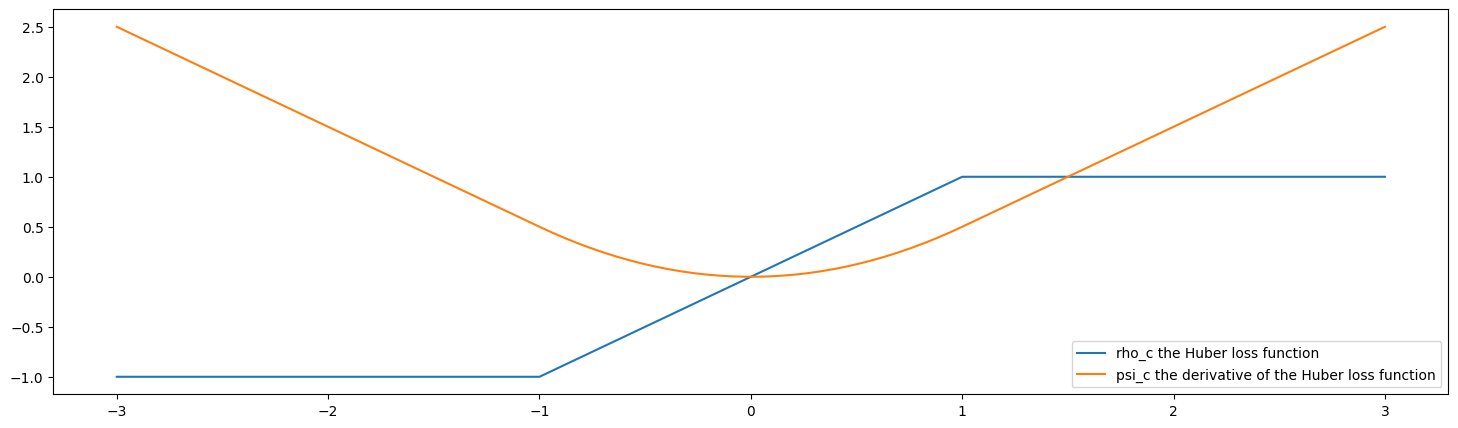

In [5]:
# Here's an example of rho and psi
import numpy as np; import matplotlib.pyplot as plt

@np.vectorize
def huber_loss(t,c):
    if np.abs(t)<=c:
        return t**2/2
    return c*np.abs(t)-c**2/2

@np.vectorize
def huber_slope(t,c):
    if t>c:
        return c
    elif t<-c:
        return -c
    else:
        return t

t = np.linspace(-3.,3.,100); plt.figure(figsize=(18,5)); plt.plot(t, huber_slope(t,1.), label="rho_c the Huber loss function"); plt.plot(t, huber_loss(t,1.), label="psi_c the derivative of the Huber loss function"); plt.legend();

<a name="cell-opt-fx-quantile"></a>

## 8.6.B Quantile Regression with Quantile Loss ([Return to TOC](#cell-TOC-opt)) 

---

$$\text{For quantile } q \quad \rho_q(t) = \left\{\begin{array}{ll}(1-q) t &t \leq 0\\ qt & t> 0 \end{array}\right. \quad \text{ then } \quad \psi_q(t) = \left\{\begin{array}{ll}(1-q) &t \leq 0\\ q & t > 0 \end{array}\right. \quad \text{ and } \quad \psi'_q(t) = 0  $$

$$\nabla_\beta \sum_{i=1}^n \rho_q(y_i-x_i^T \beta) = \sum_{i=1}^n -\psi_q(y_i-x_i^T \beta)x_i = \sum_{i=1}^n -\psi_q(y-X\beta)x_i = -X^T\psi_q(y-X\beta)$$


and while there is no ***Hessian*** we can still use ***observed Fisher information*** (positive) ***Hessian*** approximation for ***M estimation***... 

\begin{align*}
\mathcal{I}(\beta) & = {} \sum_{i=1}^n \mathcal{I}_i(\beta) = \sum_{i=1}^n x_i\psi_q(y_i-x_i^T \beta)^2 x_i^T = X^T W X \quad \text{ with $W_{ij}=0$ and $W_{ij}=\psi_q(y_i-x_i^T \beta)^2$}\\
\beta^{(t+1)} & = {} \beta^{(t)} + (X^TWX)^{-1} X^T\psi(y-X\beta^{(t)}) \quad\quad\quad\quad \color{gray}{\text{[subtraction and negative gradient cancel]}}\\
& = {} (X^TWX)^{-1} X^TW \overset{\text{weighted least squares outcome variable}}{{\left[X\beta^{(t)}  +  W^{-1}\psi(y-X\beta^{(t)}) \right]}}
\end{align*}





<a name="cell-opt-fx-quantile-1"></a>

## 8.6.B Quantile Regression with Quantile Loss

---


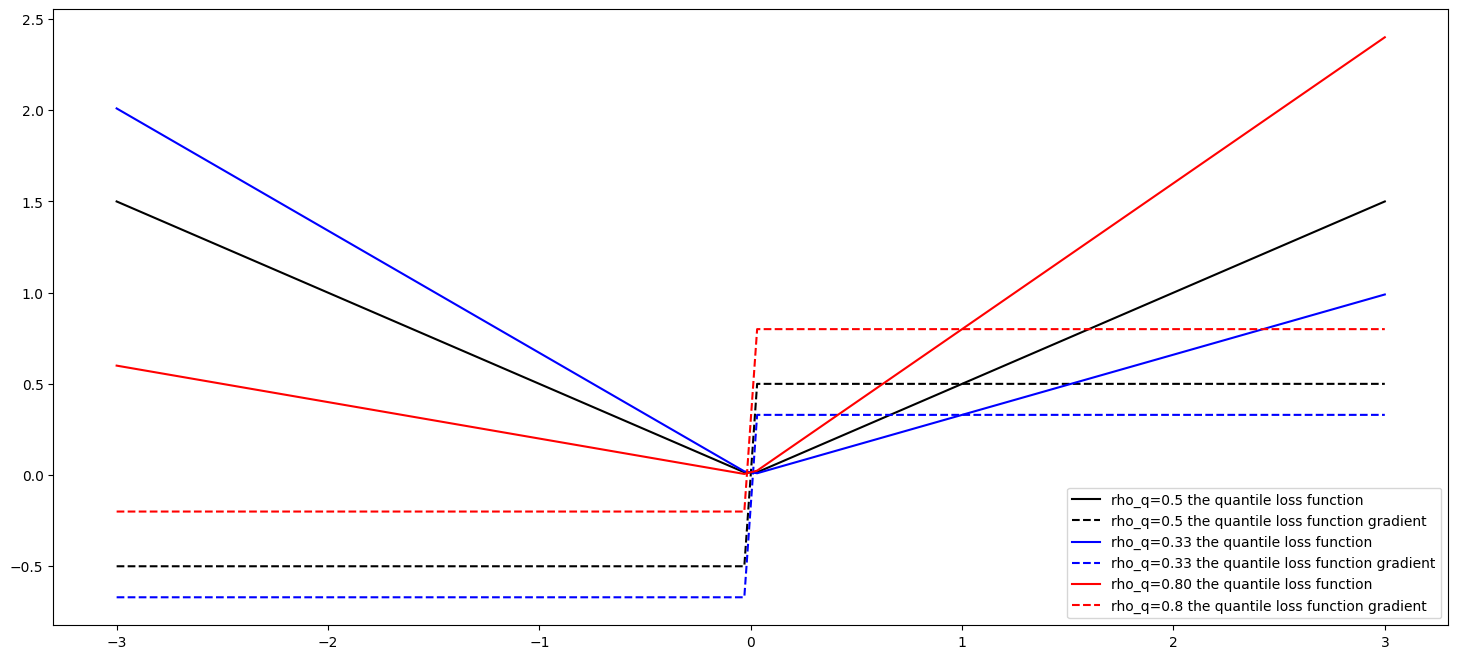

In [92]:
@np.vectorize
def quantile_loss(t,q):
    if t<=0:
        return (q-1)*t
    return q*t

@np.vectorize
def quantile_gradient(t,q):
    if t<=0:
        return q-1
    return q

t = np.linspace(-3.,3.,100); plt.figure(figsize=(18,8)); plt.plot(t, quantile_loss(t,0.5), 'k', label="rho_q=0.5 the quantile loss function"); plt.plot(t, quantile_gradient(t,0.5), 'k--', label="rho_q=0.5 the quantile loss function gradient"); plt.plot(t, quantile_loss(t,0.33), 'b', label="rho_q=0.33 the quantile loss function"); plt.plot(t, quantile_gradient(t,0.33), 'b--', label="rho_q=0.33 the quantile loss function gradient"); plt.plot(t, quantile_loss(t,0.8), 'r', label="rho_q=0.80 the quantile loss function"); plt.plot(t, quantile_gradient(t,0.8), 'r--', label="rho_q=0.8 the quantile loss function gradient"); plt.legend();

<a name="cell-opt-fx-quantile-2"></a>

## 8.6.B Quantile Regression with Quantile Loss

---


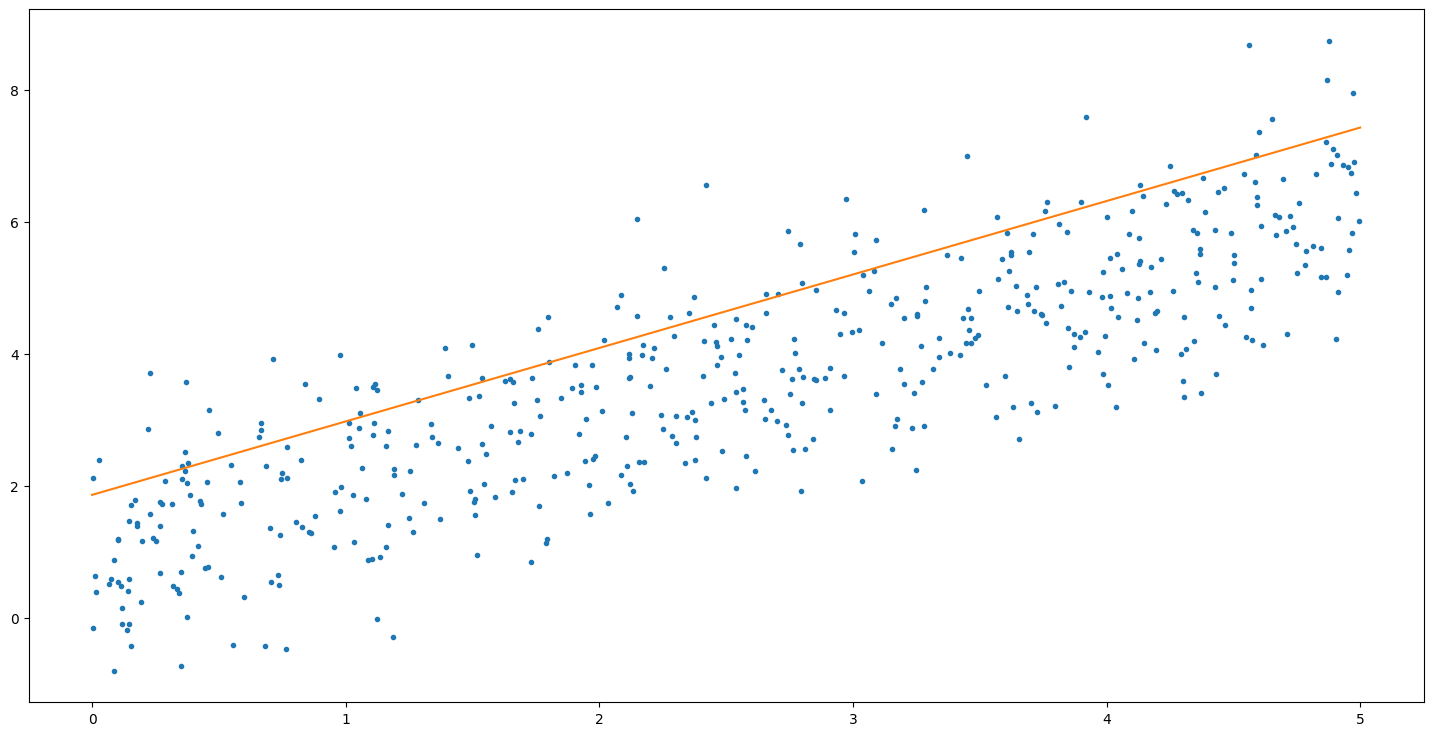

In [296]:
from scipy import stats
n = 500; beta = np.ones((2,1)); X = 5*stats.uniform().rvs(size=(n,2)); X[:,0]=1; y = (X@beta)[:,0] + stats.norm.rvs(size = n)
beta_ = np.ones((2,1))*0.5
for i in range(10):
    grad = -X.T.dot(quantile_gradient(y - (X@beta_)[:,0], 0.85)); grad = grad.reshape(2,1)
    FI = X.T@np.diag(quantile_gradient(y - (X@beta_)[:,0], 0.85)**2)@X
    #beta_ = beta_ - 0.001*grad 
    #beta_ = beta_ - np.linalg.inv(FI)@grad
    beta_ = beta_ - np.linalg.solve(FI,grad) # beta_ = np.linalg.solve(FI,FI@beta_-grad)
plt.figure(figsize=(18,9)); plt.plot(X[:,1], y, '.'); x = np.linspace(0,5,100); plt.plot(x, beta_[0]+beta_[1]*x);

<a name="cell-opt-fx-quantile-3"></a>

## 8.6.B Quantile Regression with Quantile Loss

---


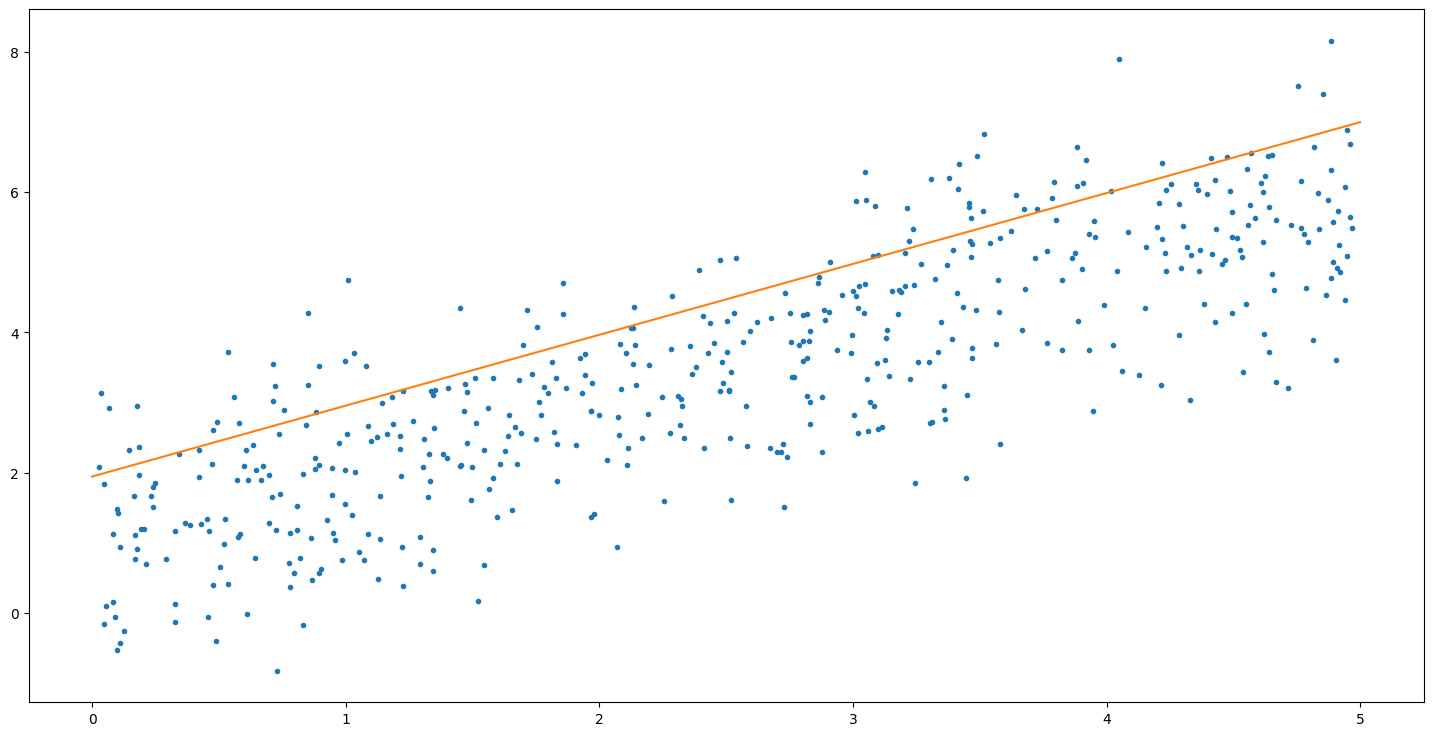

In [295]:
import statsmodels.api as sm 
# https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.WLS.html
# https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLS.html
beta_ = np.ones((2,1))*0.5
for i in range(10):
    gradient = quantile_gradient(y - (X@beta_)[:,0], 0.85)
          # sm.WLS -> NOT sm.OLS
    beta_ = sm.WLS((X@beta_)[:,0] + 1/gradient, X, weights = gradient**2).fit().params.reshape(2,1)
    
plt.figure(figsize=(18,9)); plt.plot(X[:,1], y, '.'); x = np.linspace(0,5,100); plt.plot(x, beta_[0]+beta_[1]*x);


<a name="cell-opt-fx-quasi"></a>

## 8.7 Quasi-Likelihood ([Return to TOC](#cell-TOC-opt)) 

---

***Generalized linear models*** such as ***logistic regression*** and ***poisson regression*** parameterize specific ***log likelihood*** forms  

$$\text{with parameters } \quad \text{E}[y_i|x_i] = \mu_i = \phi^{-1}(\theta_i = x_i^T \beta) \quad \text{ and } \quad \text{Var}[y_i|x_i] = V(\mu_i)$$


- but $\beta$ can be estimated implicitly (without explicit ***log likelihood***) through ***quasi-likehood*** $q(x|\mu)$  

$$\text{via the differential equation } \quad \frac{d}{d\mu_i} q(x|\mu_i) = \frac{y_i-\mu_i}{V(\mu_i)} \quad \text{ because then the }\textbf{chain rule }\text{evalutes to}$$

$$\nabla_{\beta} q(x|\mu_i) = \frac{d}{d\mu_i} q(x|\mu_i) \times \!\!\!\! \underbrace{\frac{d}{d\theta} \phi^{-1}(\theta_i)}_{\text{derivative of inverse}} \!\!\!\! \times \nabla_{\beta} x_i^T \beta = \frac{y_i-\mu_i}{V(\mu_i)} 
\left( \phi'(\phi^{-1}(x_i^T \beta)) \right)^{-1} x_i$$

and subsequently the ***Fisher information*** of $\beta$ for observation $i$ is

$$\mathcal{I}_i(\beta) = \text{E}_Y[\nabla_{\beta} q(x|\mu_i) \nabla_{\beta} q(x|\mu_i)^T] =\frac{\text{E}_Y[(y_i-\mu_i)^2] x_ix_i^T}{V(\mu_i)^2 \left( \phi'(\phi^{-1}(x_i^T \beta)) \right)^{2}} =  \frac{x_ix_i^T}{V(\mu_i)\left( \phi'(\phi^{-1}(x_i^T \beta)) \right)^{2}}$$


## 8.7 Quasi-Likelihood 

---


The ***Fisher scoring*** alternative to ***Newton's method*** to optimize the parameters $\beta$ is

$$\beta^{(t+1)} = \beta^{(t)} + \mathcal{I}_i(\beta)^{-1}\nabla_{\beta} q(x|\mu_i=x_i^T \beta)$$

Setting $W$ as the diagonal matrix with $\quad W_{ii}=\frac{1}{V(\mu_i)\left( \phi'(\phi^{-1}(x_i^T \beta)) \right)^{2}}$ 

the ***Fisher scoring*** update can be generalized to the complete sample

\begin{align*}
\beta^{(t+1)} & = {} \beta^{(t)} + (\underbrace{X^TWX}_{\mathcal{I}(\beta)})^{-1}  X^TW \left( \phi'(\mu) \odot(y-\mu) \right)\\
& = {} (X^TWX)^{-1}  X^TW \underbrace{\left(X\beta^{(t)} + \phi'(\mu) \odot(y-\mu) \right)}_{\tilde y}
\end{align*}

where $\mu = \phi^{-1}(X \beta)$ and $\odot$ indicates elementwise multiplication 

and this shows that (once again) $\beta^{*}$ is found as a sequence of ***iteratively reweighted least squares*** problems 